---
## Блок 1
---

#### Расчет статистических показателей подписчиков социальной сети
*Вам даны показатели прироста подписчиков за месяц в 300 аккаунтах социальной сети, которые сохранены в объект DataFrame с именем list_metrics*

*Выполните следующие задания применительно к исходным данным:*
- Рассчитайте стандартное отклонение прироста подписчиков. Результат округлите до второго знака после запятой и сохраните в переменную result1.

- Рассчитайте размах прироста подписчиков. Результат округлите до второго знака после запятой и сохраните в переменную result2.

- Постройте гистограмму частот по значению прироста (для этого вы можете использовать pandas.DataFrame.hist)




In [86]:
import random
import pandas as pd

random.seed(10)

list_metrics = []

for i in range(0,300):
  n = random.randint(-100,1000)
  list_metrics.append(n)



list_metrics = pd.DataFrame({'Прирост': list_metrics})
list_metrics


,Прирост
0,-34
1,778
2,888
3,-70
4,322
...,...
295,1
296,261
297,104
298,638


In [87]:
# далее ваш код
df_column = list_metrics['Прирост']

result1 = round(df_column.std(), 2)
result2 = round(df_column.max() - df_column.min(), 2)

In [88]:
print(result1 == 316.26)
print(result2 == 1094.0)

True
True


#### Исследование датасета
В этом задании предлагаю вам поработать с датасетом Pandas practices , который содержит данные об автомобилях, остановленных полицией.


Рекомендуем вам скачать датасет , датасет находится по сссылке: https://www.kaggle.com/datasets/melihkanbay/police 

Итак, для начала предлагаем проверить набор данных на наличие пропусков.

- Определите название колонки, в которой больше всего пропусков, и запишите ее название в поле ответов.
- Опрделите название колонки, в которой больше всего числовых пропусков, постарайтесь их обработать. 
- Постройте гистограмму признаков. (для этого вы можете использовать pandas.DataFrame.hist)


In [89]:
# Ваш код тут (при обработке df используйте ячейки ниже, можете сами их создать)
df = pd.read_csv('police.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

array([[<axis: title={'center': 'county_name'}>,
        <axis: title={'center': 'driver_age_raw'}>],
       [<axis: title={'center': 'driver_age'}>, <axis: >]], dtype=object)

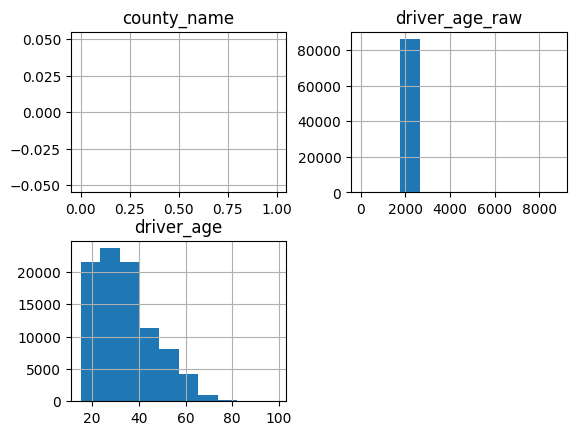

In [90]:
max_na_col = 'county_name'
na_num_col = 'driver_age'

df[na_num_col] = df[na_num_col].fillna(df[na_num_col].mean())
df.hist()

#### Исследование датасета (продолжение)
*Исследуйте данные и ответьте на вопросы:*
- Водителей какого пола в датасете больше?
- Можно ли по предыдущему пункту сделать вывод, что к одному из полов относятся предвзято, чаще останавливают? (Проведите анализ DF и дайте ответ в виде комментария, ответ обоснуйте(Построение графиков приветсвуется).)
- вычислите описательные статистики для DataFrame; 
- поразмышляйте, как вы можете использовать срезы для анализа вашего набора данных, получите необходимый срез(ы) DataFrame;
- определите, какую полезную информацию, вы можете получить о данных, используя отбор и фильтрацию, сформируйте необходимый поднабор данных и проанализируйте его;
- выполните сортировку применительно к исследуемому набору данных;
- потренируйтесь в переименование колонок исследуемого DataFrame;
- проверьте DataFrame на наличие дубликатов;
- сделайте предположение, какой новый признак вы могли бы ввести для исследуемого набора данных, и реализуйте его в созданном DataFrame.

По каждому пункту задания сделайте выводы и отразите их. Выводы представляйте либо в формате md, либо в виде комментариев. Каждое задание должно быть реализованно в минимум в 1 отдельной ячейке!



In [91]:
df['driver_gender'].value_counts()
# мужчин практически в три раза больше

driver_gender
M    62895
F    23511
Name: count, dtype: int64

In [92]:
df.groupby('driver_gender')['is_arrested'].sum()

# Всего записей о женщинах примерно в 3 раза меньше чем о мужчинах,
# а арестованных (задержанных) в 4 раза меньше, что может говорит о предвзятости

driver_gender
F     596
M    2333
Name: is_arrested, dtype: object

In [93]:
df.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,91741.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.342143
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,24.000000
50%,NaN,1980.000000,32.000000
75%,NaN,1987.000000,42.000000
max,NaN,8801.000000,99.000000


In [94]:
# можно использовать срезы, чтобы получить данные по какому-то временному отрезку
df_framed = df[df['stop_date'] > '2014-00-00']
df_framed.head(3)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
73914,2014-01-01,00:39,NaN,M,1965.0,49.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
73915,2014-01-01,00:54,NaN,M,1993.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
73916,2014-01-01,01:33,NaN,F,1987.0,27.0,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Citation,False,30+ Min,False


In [97]:
df_renamed = df.rename(columns={'stop_date': 'stoping_date', 'stop_time': 'stoping_time'})
df_renamed.head()

,stoping_date,stoping_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
print(df.shape, df.duplicated().sum())
df_clean = df.drop_duplicates()
print(df_clean.shape, df_clean.duplicated().sum())
df = df_clean

(91741, 15) 479
(91262, 15) 0


---
## Блок 2
---

#### Для выполнения следущих заданий вам необходимо скачать датасет по ссылке: https://www.kaggle.com/datasets/georgescutelnicu/top-100-popular-movies-from-2003-to-2022-imdb
Каждый блок задания выполняется в разных ячейках

Выводы, которые вы делаете помечайте в комментариях или в формате md
##### Первичный анализ:
- Выведи основную информацию о датафрейме (количество строк, столбцов, типы данных)
- Проверь наличие пропущенных значений в каждом столбце
- Выведи основные статистики для числовых столбцов

##### Анализ пропущенных значений
*Задание:*
1. Определи, в каких столбцах есть пропущенные значения
2. Заполни пропуски в столбце 'Certificate' значением 'Unknown'
3. Для числовых столбцов с пропусками заполни их медианными значениями
4. Удали строки, где пропущено значение в столбце 'Title'

##### Анализ распределения рейтингов

*Задание:*
 1. Построй гистограмму распределения рейтингов фильмов (столбец 'Rating')
 2. Рассчитай и выведи средний, минимальный и максимальный рейтинг
 3. Построй boxplot (ящик с усами) для рейтингов и определи есть ли выбросы
 4. Выведи топ-5 фильмов с самым высоким рейтингом

##### Анализ по годам
*Задание:*
 1. Сгруппируй данные по году (столбец 'Year') и рассчитай средний рейтинг для каждого года
 2. Построй линейный график изменения среднего рейтинга по годам
 3. Определи год с самым высоким средним рейтингом и год с самым низким
 4. Посчитай количество фильмов в топ-100 для каждого года

##### Анализ продолжительности фильмов
 *Задание:*
 1. Преобразуй столбец 'Duration' в числовой формат (минуты)
 2. Построй гистограмму распределения продолжительности фильмов
 3. Рассчитай среднюю продолжительность фильма
 4. Построй boxplot для продолжительности и определи есть ли аномальные значения
 5. Выведи топ-5 самых длинных и топ-5 самых коротких фильмов

##### Анализ жанров
 *Задание:*
 1. Раздели столбец 'Genre' на отдельные жанры (некоторые фильмы имеют несколько жанров)
 2. Посчитай количество фильмов для каждого жанра
 3. Построй столбчатую диаграмму топ-10 самых популярных жанров
 4. Определи жанр с самым высоким средним рейтингом (среди жанров с минимум 10 фильмами)